In [6]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
%matplotlib inline

# 创建信号dataframe（策略生成步骤）

## 读取数据

In [9]:
loc = "C:/Users/workspace/brad_public_workspace_on_win/non_code_files_brad_public_workspace_on_win/brad_public_workspace_on_win_non_code_files/SH_tongliang/data/2_19_2019_火币15分钟数据/火币15分钟数据/"

In [10]:
def process_15mins_1000000(file, multiplier):
    asset = pd.read_csv(loc+file, engine="python", header = None)
    asset.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    asset['date'] = pd.to_datetime(asset['date'])
    asset.index = asset['date']
    asset = asset.iloc[1:]
    asset[['open', 'high', 'low', 'close']] = asset[['open', 'high', 'low', 'close']]*multiplier
    return asset


ltc_15mins_1000000 = process_15mins_1000000("ltc15min.csv", 1000000)

In [11]:
ltc_15mins_1000000.head(2)

,date,open,high,low,close,volume
date,,,,,,
2017-07-28 18:30:00,2017-07-28 18:30:00,15200.0,15200.0,15050.0,15150.0,0.082344
2017-07-28 18:45:00,2017-07-28 18:45:00,15100.0,15150.0,14950.0,15000.0,0.120370


In [10]:
signal_df = ltc_15mins_1000000[['close']]
signal_df['10_MA'] = signal_df['close'].rolling(window = 10).mean()

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


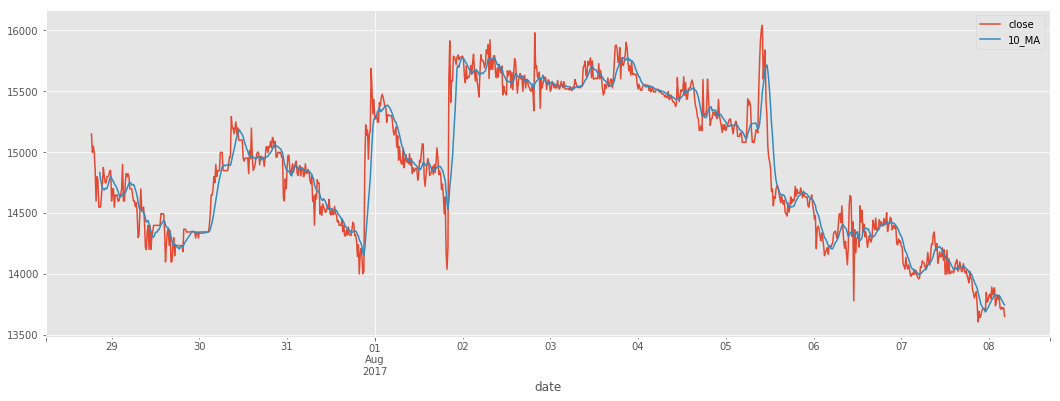

In [11]:
signal_df.head(1000).plot(figsize = (18, 6))

In [12]:
(3823.42-3835)/3835

-0.0030195567144719495

## 生成信号

In [13]:
signal_df['diff'] = signal_df['10_MA'] - signal_df['close']
signal_df['signal'] = signal_df['diff'].apply(lambda x: 1 if x>0 else -1 if x < 0 else 0)

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
signal_df_ = signal_df[['close', 'signal']]
signal_df_['price_diff'] = signal_df_['close'].diff()
signal_df_['forward_signal'] = signal_df_['signal'].shift(1)
signal_df_['returns'] = signal_df_['forward_signal']*signal_df_['price_diff']
signal_df_['cum_returns'] = signal_df_['returns'].cumsum()

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 图像验证信号

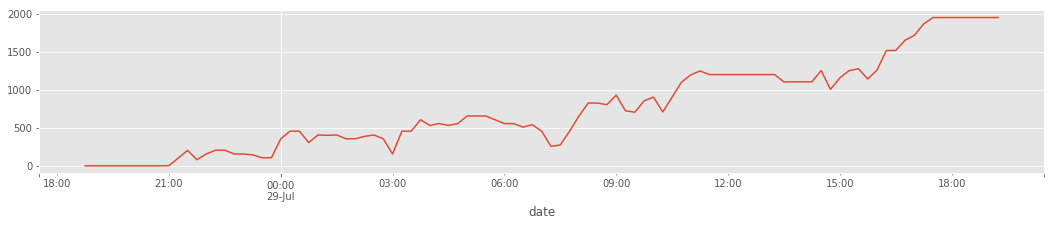

In [15]:
signal_df_['cum_returns'].head(100).plot(figsize = (18, 3))

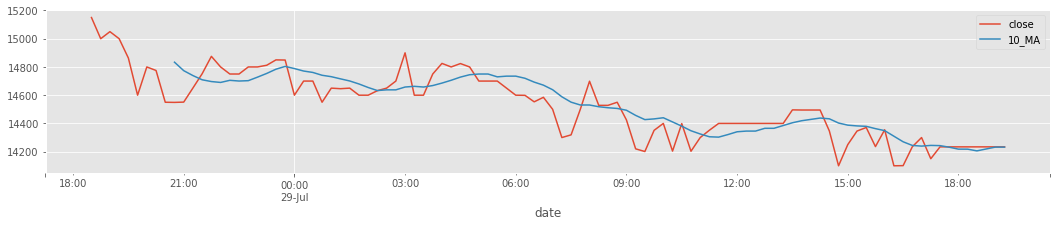

In [16]:
signal_df[['close', '10_MA']].head(100).plot(figsize = (18, 3))

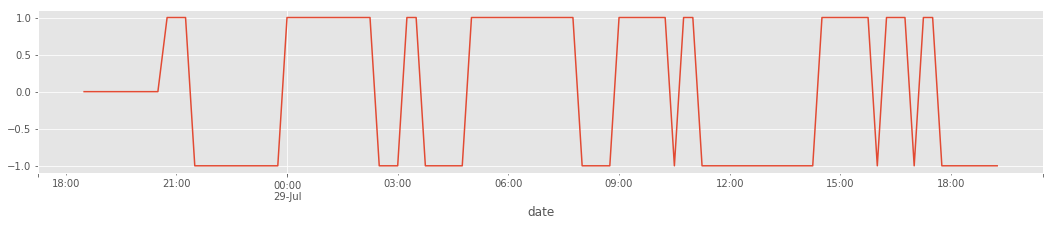

In [17]:
signal_df_['signal'].head(100).plot(figsize = (18, 3))

In [18]:
signal_df_.head(3)

,close,signal,price_diff,forward_signal,returns,cum_returns
date,,,,,,
2017-07-28 18:30:00,15150.0,0,NaN,NaN,NaN,NaN
2017-07-28 18:45:00,15000.0,0,-150.0,0.0,-0.0,0.0
2017-07-28 19:00:00,15050.0,0,50.0,0.0,0.0,0.0


# 创建函数一：calc_single_performance

In [19]:
def calc_single_performance(signal_df, price_col):
    """
    1. date是经过函数pd.to_datetime()处理过后的index
    2. signal的值为0或者-1或者1，分别代表不持仓、空头信号和多头信号
    
    signal_df的格式示例如下：

    =============================
                  price   signal
       date
    2017-07-28     256.3    -1
    2017-07-29     259.5     0
    =============================
    """
    signal_df['price_diff'] = signal_df[price_col].diff()
    signal_df['forward_signal'] = signal_df['signal'].shift(1)
    signal_df['returns'] = signal_df['forward_signal']*signal_df['price_diff']
    signal_df['cum_returns'] = signal_df['returns'].cumsum()
    return signal_df

In [20]:
signal_df.head(2)

,close,10_MA,diff,signal
date,,,,
2017-07-28 18:30:00,15150.0,NaN,NaN,0
2017-07-28 18:45:00,15000.0,NaN,NaN,0


In [21]:
signal_df_sample = signal_df[['close', 'signal']]
performance_sample = calc_single_performance(signal_df_sample, "close")

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
performance_sample.head(5)

,close,signal,price_diff,forward_signal,returns,cum_returns
date,,,,,,
2017-07-28 18:30:00,15150.0,0,NaN,NaN,NaN,NaN
2017-07-28 18:45:00,15000.0,0,-150.0,0.0,-0.0,0.0
2017-07-28 19:00:00,15050.0,0,50.0,0.0,0.0,0.0
2017-07-28 19:15:00,15000.0,0,-50.0,0.0,-0.0,0.0
2017-07-28 19:30:00,14863.0,0,-137.0,0.0,-0.0,0.0


# 创建函数二：performance_metrics

In [24]:
cum_returns = performance_sample['cum_returns']

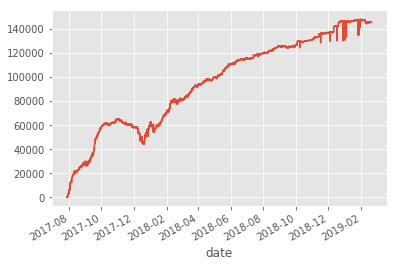

In [26]:
cum_returns.plot()

In [41]:
perf_returns = performance_sample['returns']

In [45]:
pred_wrong = performance_sample[performance_sample['returns']<0]
pred_correct = performance_sample[performance_sample['returns']>0]

In [50]:
print ("Correction rate: ", len(pred_correct)/len(performance_sample))

Correction rate:  0.5214927385703092


In [51]:
print ("Expected returns", performance_sample['returns'].mean())

Expected returns 2.6611756988228428


# 使用package进行运行

In [1]:
lib_path = r'C:/Users/workspace/brad_public_workspace_on_win/brad_public_workspace_on_win/backtester/brad_vbacktester/'
file_path = 'C:/Users/workspace/brad_public_workspace_on_win/brad_public_workspace_on_win/backtester/brad_vbacktester/'
file = "btc_contract_15m_test_run_bt.csv"

from sys import path
path.append(lib_path) #将存放module的路径添加进来

from metrics import expected_returns, win_loss_rate
from performance import sngl_performance
from data import process_sngl_data
from plot import plot_cum_returns
from strategies import Strat_SMA

data = process_sngl_data(file_path, file)
signal_df = Strat_SMA(data, 'close', 10)
sngl_performance = sngl_performance(signal_df, 'close')
win_loss_rate(sngl_performance)
expected_returns(sngl_performance, 'close')

Correct rate:  0.5320183096597613
Expected returns: 0.0015%


C:/Users/workspace/brad_public_workspace_on_win/brad_public_workspace_on_win/backtester/brad_vbacktester\strategies.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[SMA_col] = df[price_col].rolling(window = window).mean()
C:/Users/workspace/brad_public_workspace_on_win/brad_public_workspace_on_win/backtester/brad_vbacktester\strategies.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['diff'] = df[SMA_col] - df[price_col]
C:/Users/workspace/brad_public_workspace_on_win/brad_public_workspace_on_win/backtester/brad_vbacktester\st

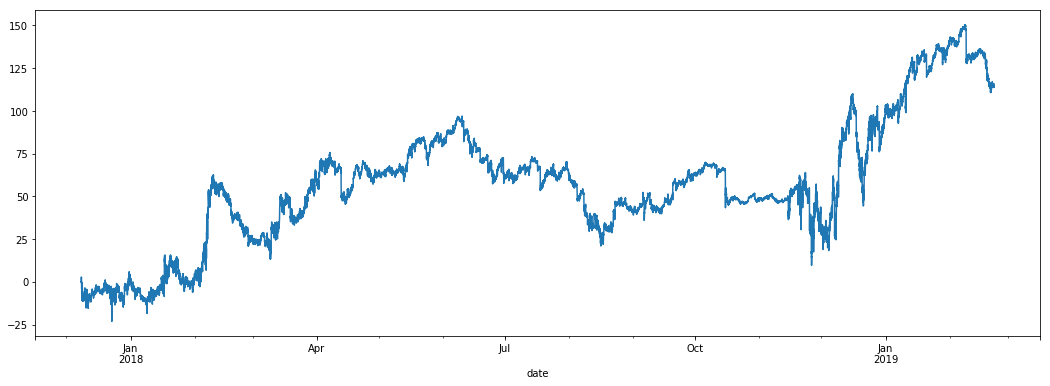

In [2]:
plot_cum_returns(sngl_performance, figsize=(18, 6))